In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pandas_datareader.data as web

In [2]:
df = web.DataReader('2330.TW', 'yahoo')

In [3]:
X = df.loc[:, ["High","Low","Open","Close","Volume"]].values
Y = df.loc[:, ["Close"]].values
x = X[ len(X)-300-1 :  len(X)-1, :]
y = Y[ len(Y)-300 :  len(Y)]

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [5]:
x_train_svc, x_test_svc, y_train_svc, y_test_svc = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size=0.2,
                                                   random_state=0)

In [7]:
clf = SVC(gamma='auto')
clf.fit(x_train_svc, np.ravel(y_train_svc.astype('int')))

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

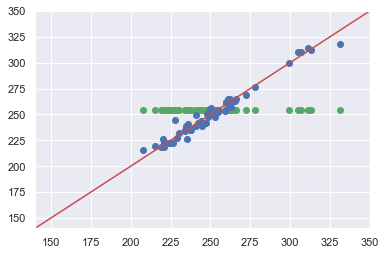

In [9]:
y_predict_svc = clf.predict(x_test_svc)
y_predict = model.predict(x_test)
sns.set()
plt.scatter(y_test_svc, y_predict_svc,c='g')
plt.scatter(y_test, y_predict,c='b')
plt.xlim(140,350)
plt.ylim(140,350)
plt.plot([140,350],[140,350],'r')